# House Prediction

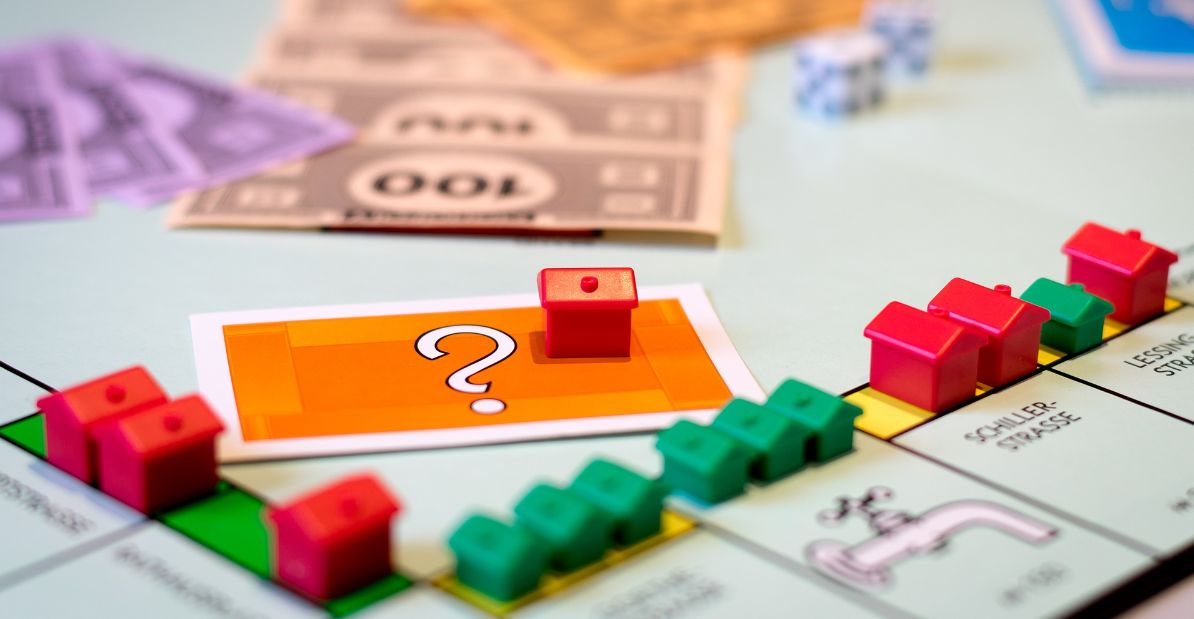

Business Porblem: A machine learning model will be created using the data set with the features and price of each house.

Dataset: This dataset of residential homes in Lowa, Ames includes 79 explanatory variables. Since the dataset belongs to a kaggle competition, there are two different csv files, train and test. In the test dataset, house prices are empty, and you are expected to predict these values from the model.



In [959]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 120)

## Task 1: Exploratory Data Analysis (EDA)

**1) Read train and test csv files and concatenate them**

In [960]:
train_df = pd.read_csv('data/train.csv')

In [961]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [962]:
test_df = pd.read_csv('data/test.csv')

In [963]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [964]:
df = pd.concat([train_df, test_df])
df.index = range(0, len(df))

In [965]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [966]:
df.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        444
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        991
BsmtFinType2        6
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1058
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF         1083
2ndFlrSF          635
LowQualFin

**2) Get the numerical and categorical columns**

In [967]:
def grab_col_names(dataframe, cat_th=10, car_th=20):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'Categorical Variables: {len(cat_cols)}')
    print(f'Numerical Variables: {len(num_cols)}')
    print(f'Numerical But Categorical Variables: {len(num_but_cat)}')
    print(f'Categorical But Cardinal: {len(cat_but_car)}')
    
    return cat_cols, num_cols, cat_but_car

In [968]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=20, car_th=25)

Observations: 2919
Variables: 81
Categorical Variables: 58
Numerical Variables: 23
Numerical But Categorical Variables: 15
Categorical But Cardinal: 0


In [969]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [970]:
num_cols.remove('Id')

In [971]:
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

**4-Summarize the numerical and categorical variables**

Distribution of numerical variables

In [973]:
def num_summary(dataframe, numerical_col, plot=False):
    print(numerical_col.upper())
    quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        plt.figure(figsize=(5, 5))
        sns.histplot(data=dataframe, x=numerical_col)
        plt.title(numerical_col)
        plt.xlabel(numerical_col)
        plt.show()
       
    print('################################################################\n')

LOTFRONTAGE
count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
10%        43.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        68.000000
60%        73.000000
70%        78.000000
80%        84.000000
90%        95.000000
max       313.000000
Name: LotFrontage, dtype: float64


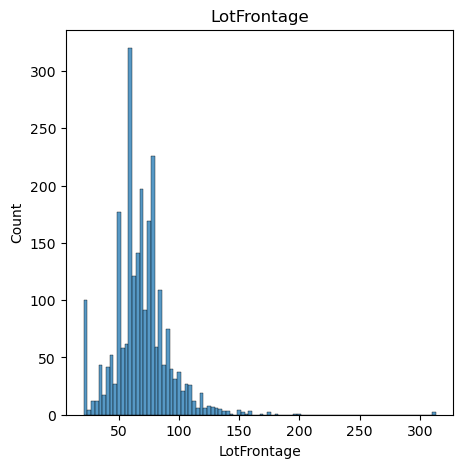

################################################################

LOTAREA
count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
10%        4922.400000
20%        7007.600000
30%        7960.400000
40%        8741.000000
50%        9453.000000
60%       10151.600000
70%       11001.200000
80%       12203.800000
90%       14300.600000
max      215245.000000
Name: LotArea, dtype: float64


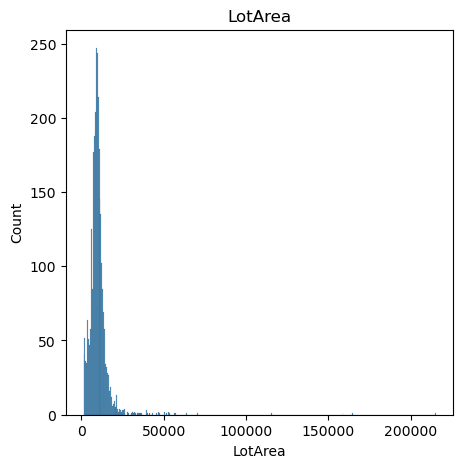

################################################################

YEARBUILT
count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
10%      1924.000000
20%      1947.000000
30%      1957.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1998.000000
80%      2003.000000
90%      2006.000000
max      2010.000000
Name: YearBuilt, dtype: float64


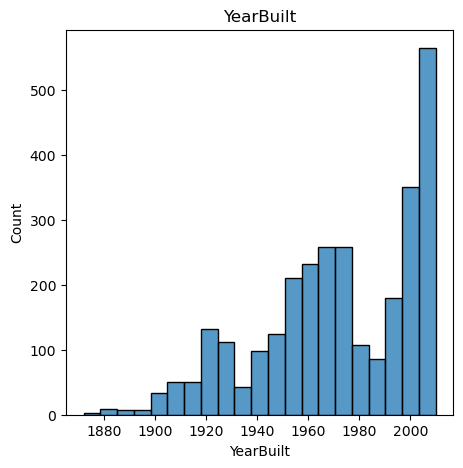

################################################################

YEARREMODADD
count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
10%      1950.000000
20%      1960.000000
30%      1970.000000
40%      1978.000000
50%      1993.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.200000
max      2010.000000
Name: YearRemodAdd, dtype: float64


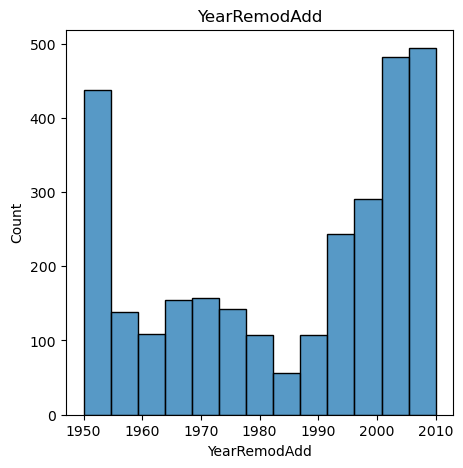

################################################################

MASVNRAREA
count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%       120.000000
80%       202.000000
90%       325.500000
max      1600.000000
Name: MasVnrArea, dtype: float64


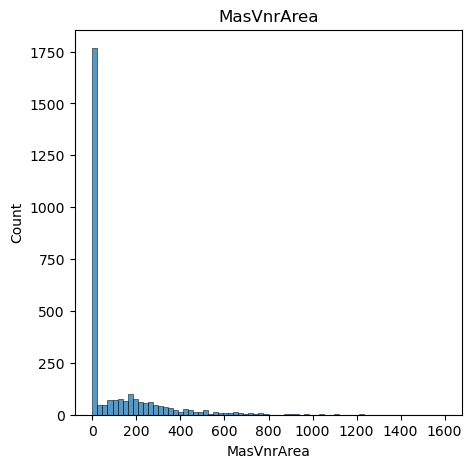

################################################################

BSMTFINSF1
count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       202.600000
50%       368.500000
60%       515.200000
70%       656.000000
80%       812.000000
90%      1056.900000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


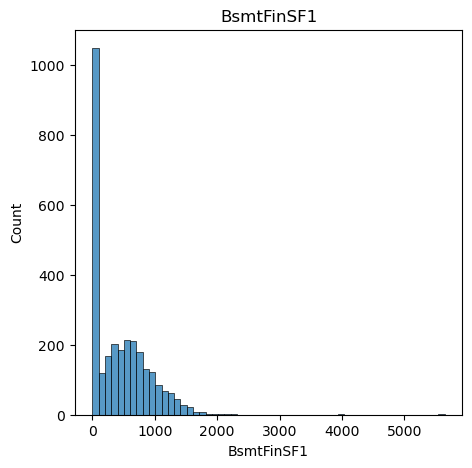

################################################################

BSMTFINSF2
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       125.600000
max      1526.000000
Name: BsmtFinSF2, dtype: float64


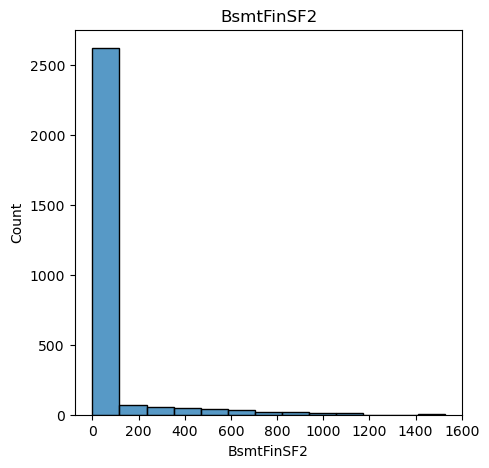

################################################################

BSMTUNFSF
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
10%        56.000000
20%       174.000000
30%       270.000000
40%       365.800000
50%       467.000000
60%       595.000000
70%       732.000000
80%       892.600000
90%      1212.600000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


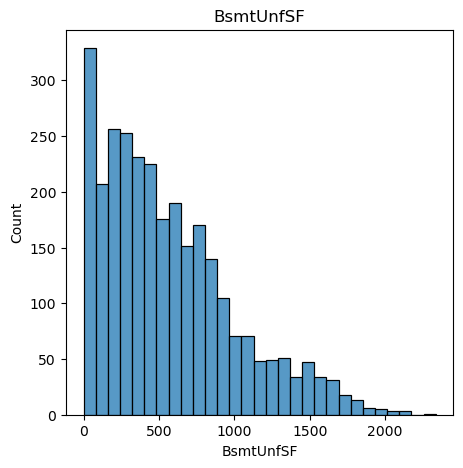

################################################################

TOTALBSMTSF
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
10%       600.000000
20%       741.000000
30%       836.000000
40%       911.000000
50%       989.500000
60%      1089.200000
70%      1216.000000
80%      1392.000000
90%      1614.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


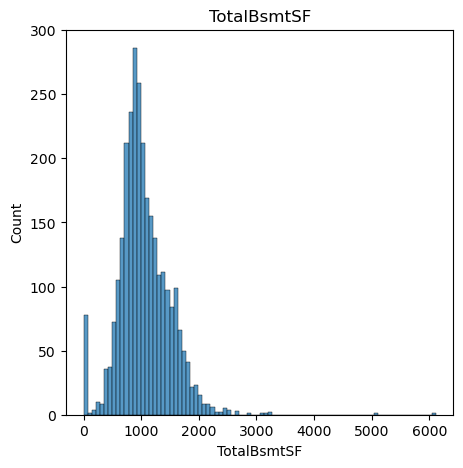

################################################################

1STFLRSF
count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
10%       744.800000
20%       847.000000
30%       914.000000
40%       996.200000
50%      1082.000000
60%      1180.000000
70%      1314.000000
80%      1483.400000
90%      1675.000000
max      5095.000000
Name: 1stFlrSF, dtype: float64


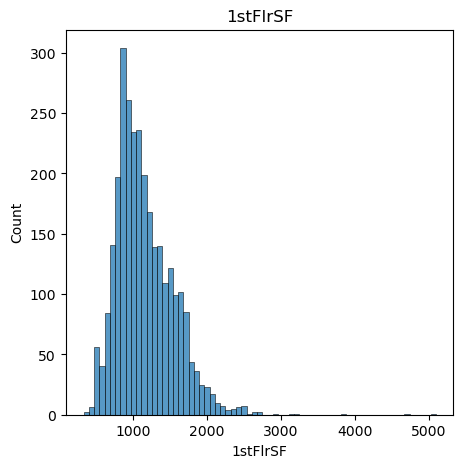

################################################################

2NDFLRSF
count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       427.400000
70%       636.000000
80%       770.800000
90%       925.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


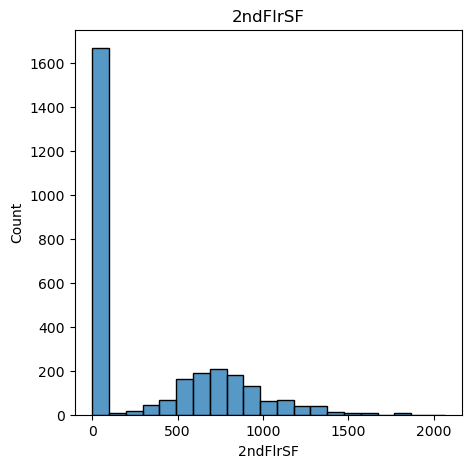

################################################################

LOWQUALFINSF
count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64


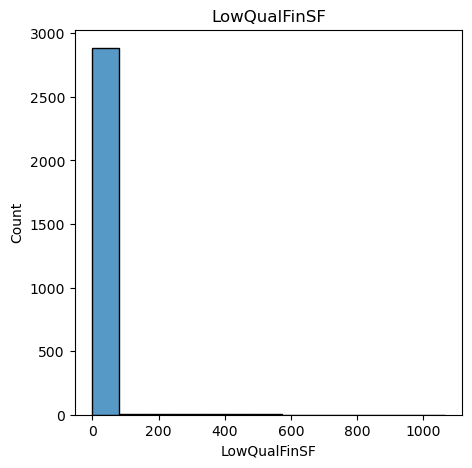

################################################################

GRLIVAREA
count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
10%       923.800000
20%      1064.600000
30%      1200.000000
40%      1329.200000
50%      1444.000000
60%      1560.000000
70%      1680.000000
80%      1838.400000
90%      2153.200000
max      5642.000000
Name: GrLivArea, dtype: float64


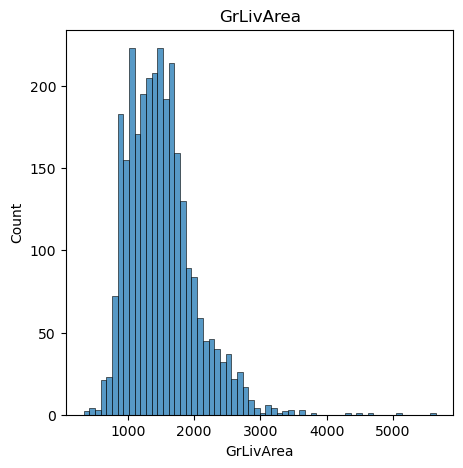

################################################################

GARAGEYRBLT
count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
10%      1941.000000
20%      1957.000000
30%      1964.000000
40%      1972.000000
50%      1979.000000
60%      1993.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64


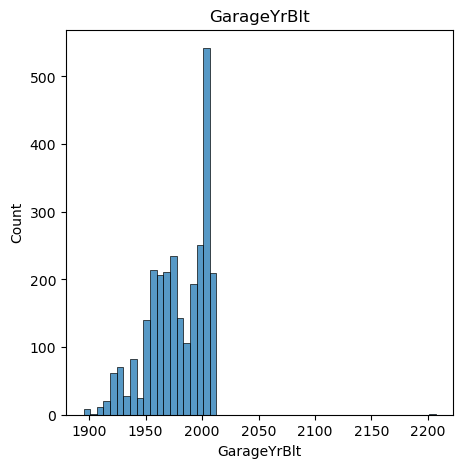

################################################################

GARAGEAREA
count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
10%       240.000000
20%       296.000000
30%       379.000000
40%       440.000000
50%       480.000000
60%       513.000000
70%       560.900000
80%       621.000000
90%       758.000000
max      1488.000000
Name: GarageArea, dtype: float64


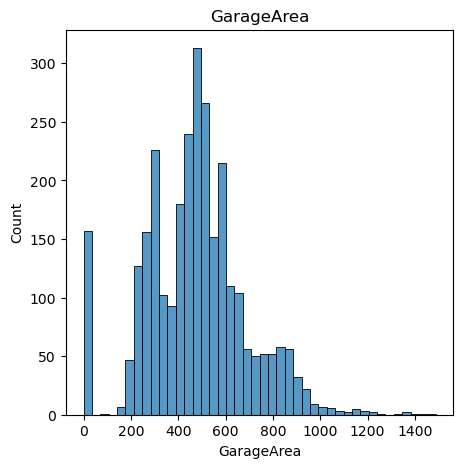

################################################################

WOODDECKSF
count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       257.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64


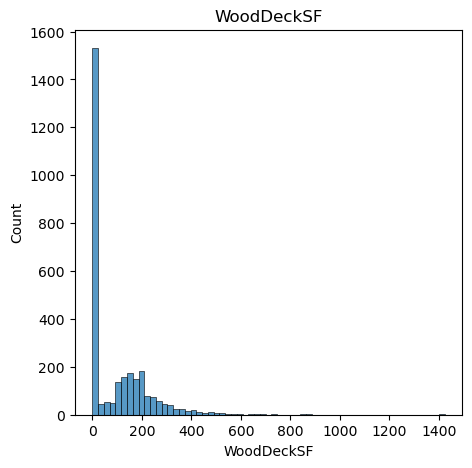

################################################################

OPENPORCHSF
count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        26.000000
60%        40.000000
70%        58.000000
80%        85.000000
90%       131.200000
max       742.000000
Name: OpenPorchSF, dtype: float64


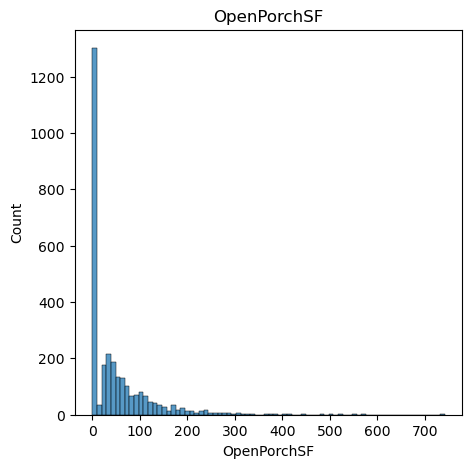

################################################################

ENCLOSEDPORCH
count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64


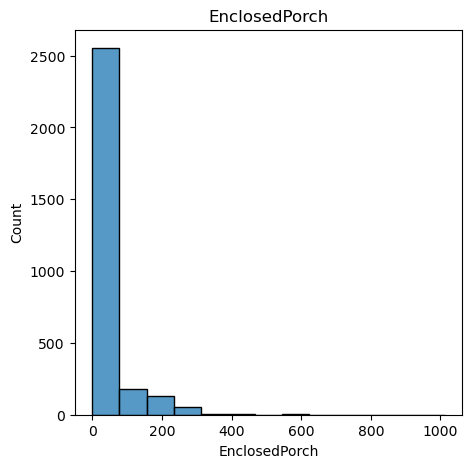

################################################################

3SSNPORCH
count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


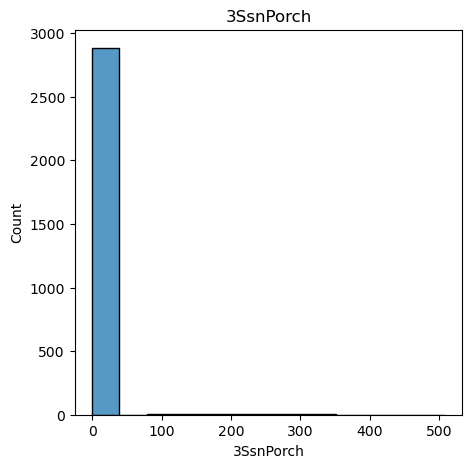

################################################################

SCREENPORCH
count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64


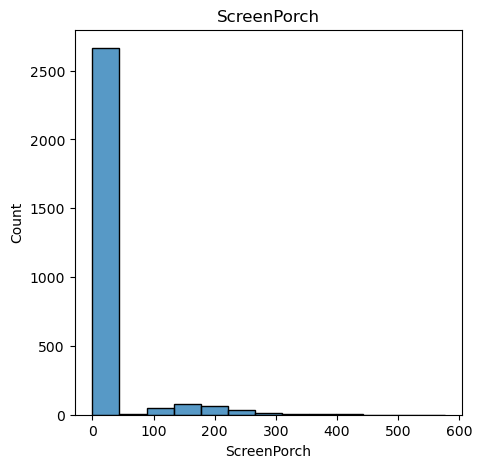

################################################################

MISCVAL
count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64


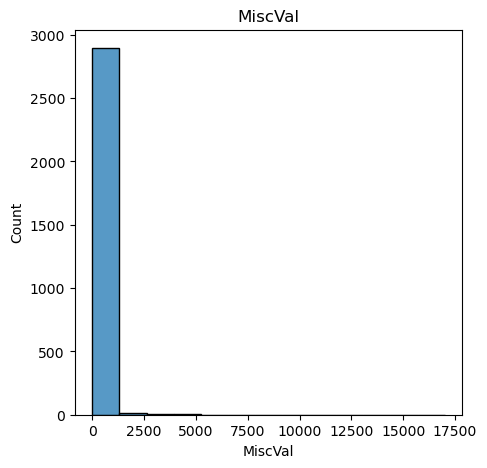

################################################################

SALEPRICE
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
max      755000.000000
Name: SalePrice, dtype: float64


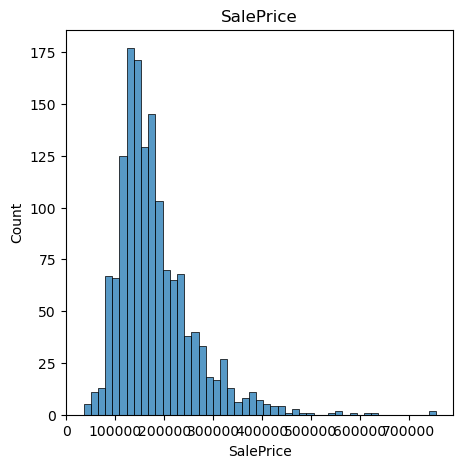

################################################################



In [974]:
for col in num_cols:
    num_summary(df, col, plot=True)

Distribution of categorical variables

In [975]:
df['Alley'].value_counts() / len(df)

Grvl    0.041110
Pave    0.026721
Name: Alley, dtype: float64

In [976]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': df[col_name].value_counts() / len(df)}))
    
    if plot:
        plt.figure(figsize=(5, 5))
        sns.countplot(x=col_name, data=dataframe)
        plt.xticks(rotation=90)
        plt.show()
        
    print('######################################################################\n')

         MSZoning     Ratio
RL           2265  0.775951
RM            460  0.157588
FV            139  0.047619
RH             26  0.008907
C (all)        25  0.008565


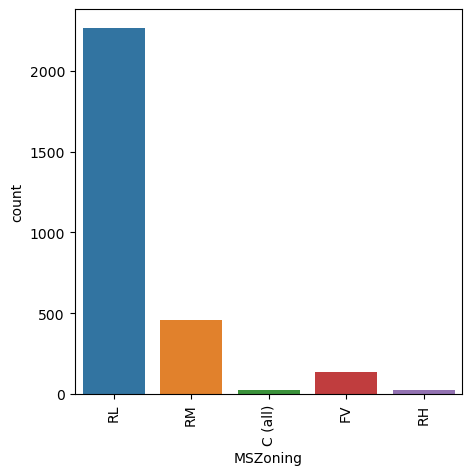

######################################################################

      Street     Ratio
Pave    2907  0.995889
Grvl      12  0.004111


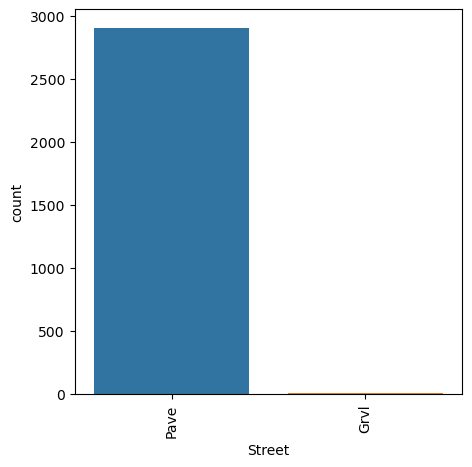

######################################################################

      Alley     Ratio
Grvl    120  0.041110
Pave     78  0.026721


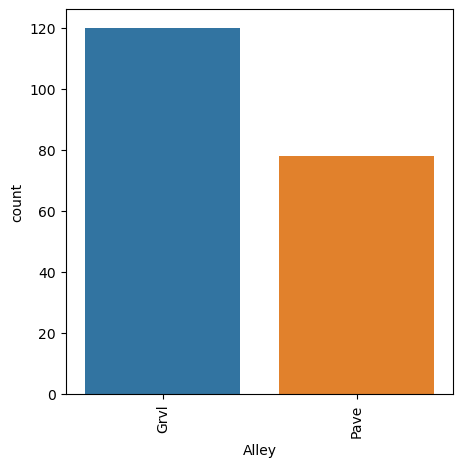

######################################################################

     LotShape     Ratio
Reg      1859  0.636862
IR1       968  0.331620
IR2        76  0.026036
IR3        16  0.005481


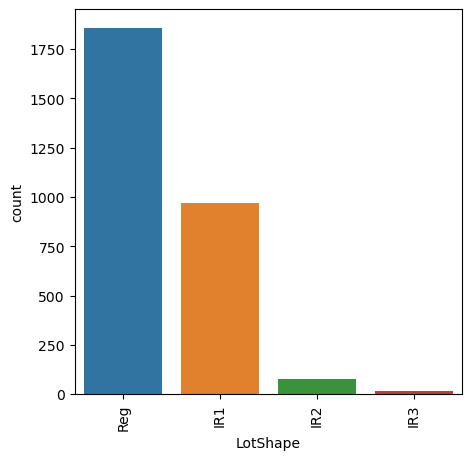

######################################################################

     LandContour     Ratio
Lvl         2622  0.898253
HLS          120  0.041110
Bnk          117  0.040082
Low           60  0.020555


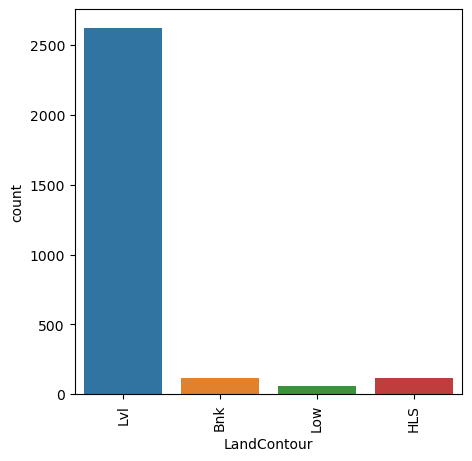

######################################################################

        Utilities     Ratio
AllPub       2916  0.998972
NoSeWa          1  0.000343


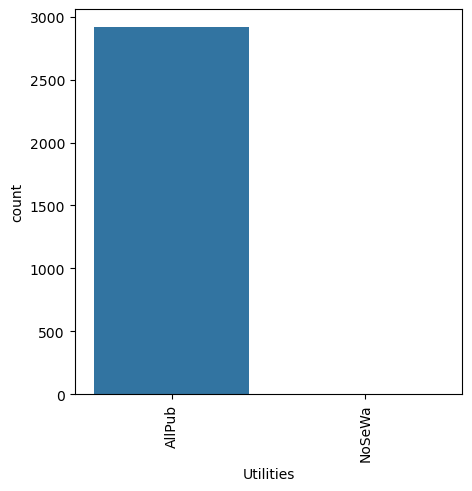

######################################################################

         LotConfig     Ratio
Inside        2133  0.730730
Corner         511  0.175060
CulDSac        176  0.060295
FR2             85  0.029120
FR3             14  0.004796


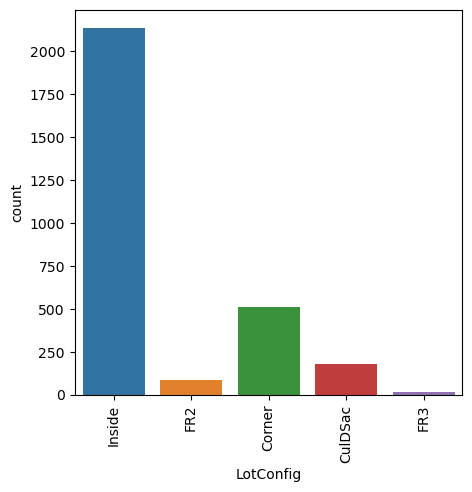

######################################################################

     LandSlope     Ratio
Gtl       2778  0.951696
Mod        125  0.042823
Sev         16  0.005481


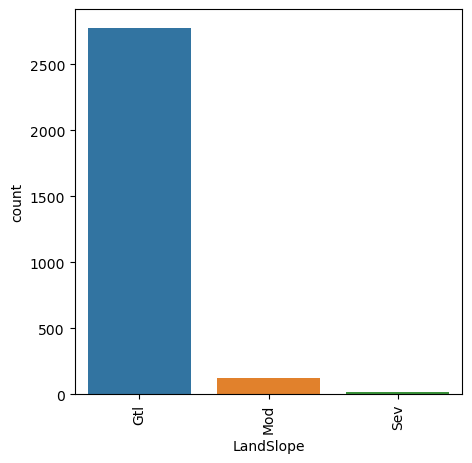

######################################################################

         Neighborhood     Ratio
NAmes             443  0.151764
CollgCr           267  0.091470
OldTown           239  0.081877
Edwards           194  0.066461
Somerst           182  0.062350
NridgHt           166  0.056869
Gilbert           165  0.056526
Sawyer            151  0.051730
NWAmes            131  0.044878
SawyerW           125  0.042823
Mitchel           114  0.039054
BrkSide           108  0.036999
Crawfor           103  0.035286
IDOTRR             93  0.031860
Timber             72  0.024666
NoRidge            71  0.024323
StoneBr            51  0.017472
SWISU              48  0.016444
ClearCr            44  0.015074
MeadowV            37  0.012676
BrDale             30  0.010277
Blmngtn            28  0.009592
Veenker            24  0.008222
NPkVill            23  0.007879
Blueste            10  0.003426


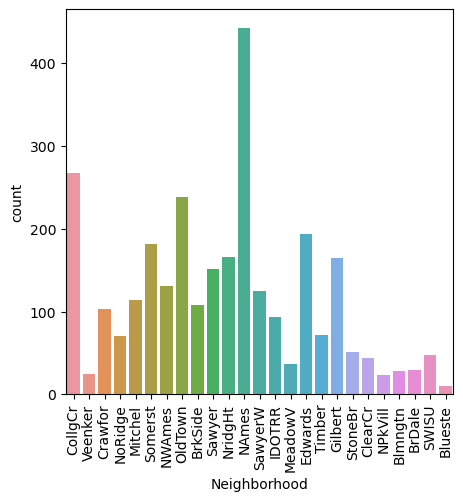

######################################################################

        Condition1     Ratio
Norm          2511  0.860226
Feedr          164  0.056184
Artery          92  0.031518
RRAn            50  0.017129
PosN            39  0.013361
RRAe            28  0.009592
PosA            20  0.006852
RRNn             9  0.003083
RRNe             6  0.002055


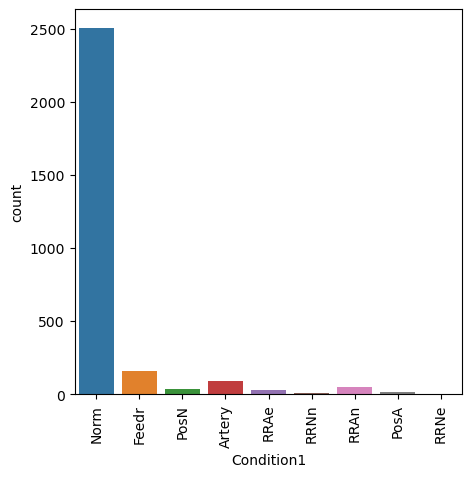

######################################################################

        Condition2     Ratio
Norm          2889  0.989723
Feedr           13  0.004454
Artery           5  0.001713
PosN             4  0.001370
PosA             4  0.001370
RRNn             2  0.000685
RRAn             1  0.000343
RRAe             1  0.000343


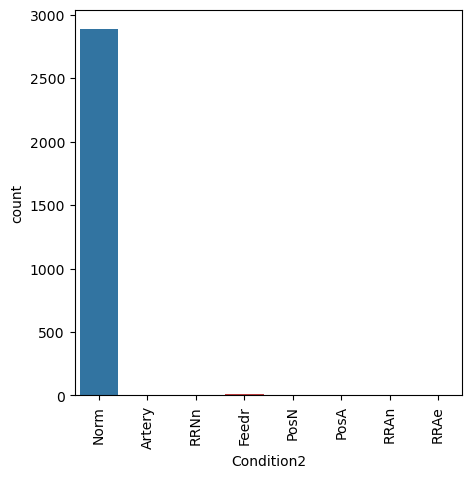

######################################################################

        BldgType     Ratio
1Fam        2425  0.830764
TwnhsE       227  0.077766
Duplex       109  0.037342
Twnhs         96  0.032888
2fmCon        62  0.021240


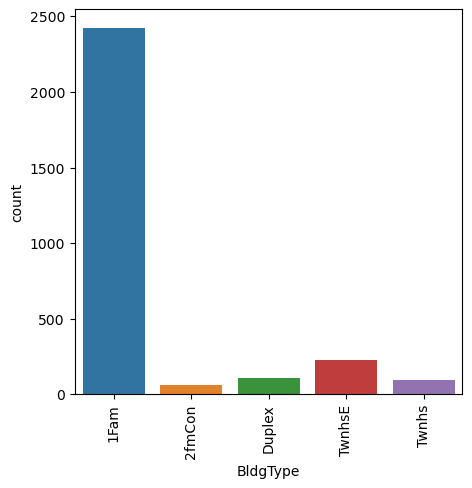

######################################################################

        HouseStyle     Ratio
1Story        1471  0.503940
2Story         872  0.298732
1.5Fin         314  0.107571
SLvl           128  0.043851
SFoyer          83  0.028434
2.5Unf          24  0.008222
1.5Unf          19  0.006509
2.5Fin           8  0.002741


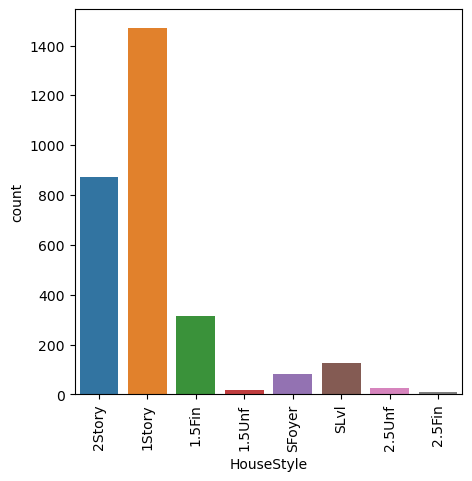

######################################################################

         RoofStyle     Ratio
Gable         2310  0.791367
Hip            551  0.188763
Gambrel         22  0.007537
Flat            20  0.006852
Mansard         11  0.003768
Shed             5  0.001713


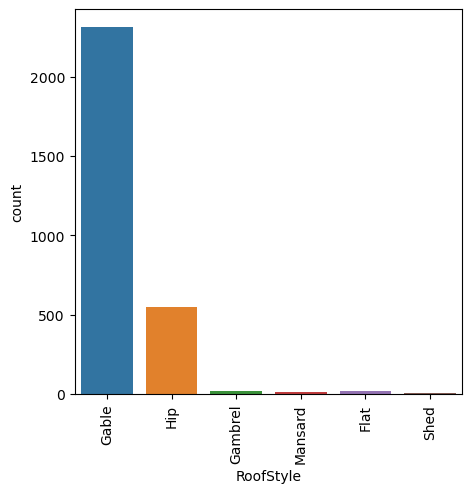

######################################################################

         RoofMatl     Ratio
CompShg      2876  0.985269
Tar&Grv        23  0.007879
WdShake         9  0.003083
WdShngl         7  0.002398
Metal           1  0.000343
Membran         1  0.000343
Roll            1  0.000343
ClyTile         1  0.000343


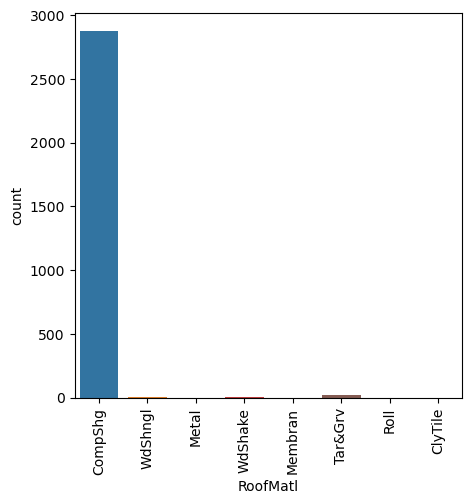

######################################################################

         Exterior1st     Ratio
VinylSd         1025  0.351148
MetalSd          450  0.154162
HdBoard          442  0.151422
Wd Sdng          411  0.140802
Plywood          221  0.075711
CemntBd          126  0.043165
BrkFace           87  0.029805
WdShing           56  0.019185
AsbShng           44  0.015074
Stucco            43  0.014731
BrkComm            6  0.002055
AsphShn            2  0.000685
Stone              2  0.000685
CBlock             2  0.000685
ImStucc            1  0.000343


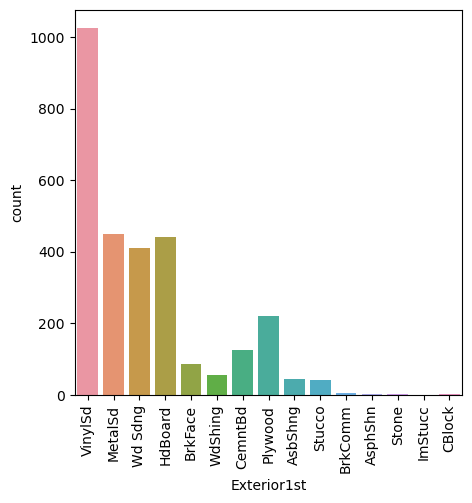

######################################################################

         Exterior2nd     Ratio
VinylSd         1014  0.347379
MetalSd          447  0.153135
HdBoard          406  0.139089
Wd Sdng          391  0.133950
Plywood          270  0.092497
CmentBd          126  0.043165
Wd Shng           81  0.027749
BrkFace           47  0.016101
Stucco            47  0.016101
AsbShng           38  0.013018
Brk Cmn           22  0.007537
ImStucc           15  0.005139
Stone              6  0.002055
AsphShn            4  0.001370
CBlock             3  0.001028
Other              1  0.000343


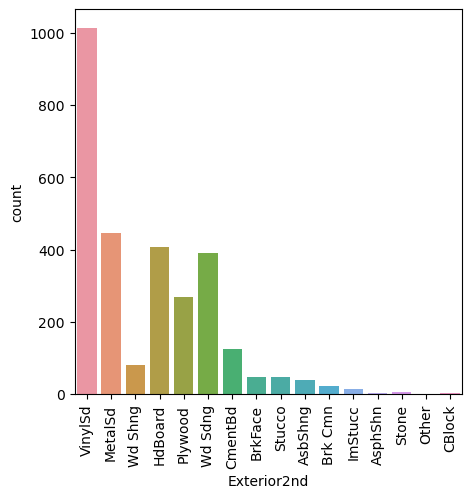

######################################################################

         MasVnrType     Ratio
None           1742  0.596780
BrkFace         879  0.301131
Stone           249  0.085303
BrkCmn           25  0.008565


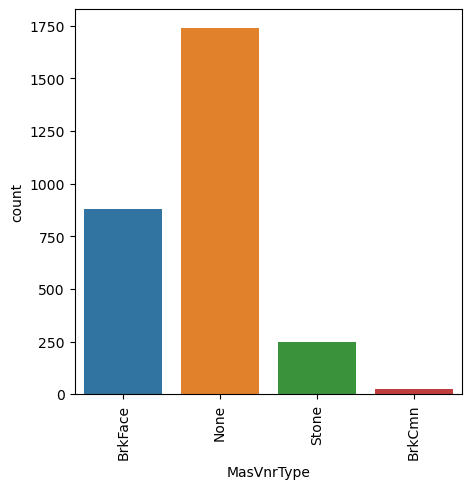

######################################################################

    ExterQual     Ratio
TA       1798  0.615964
Gd        979  0.335389
Ex        107  0.036656
Fa         35  0.011990


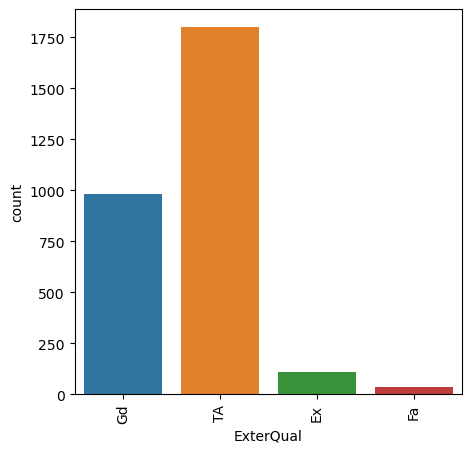

######################################################################

    ExterCond     Ratio
TA       2538  0.869476
Gd        299  0.102432
Fa         67  0.022953
Ex         12  0.004111
Po          3  0.001028


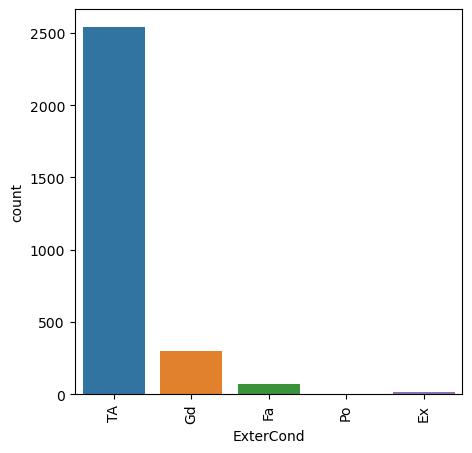

######################################################################

        Foundation     Ratio
PConc         1308  0.448099
CBlock        1235  0.423090
BrkTil         311  0.106543
Slab            49  0.016787
Stone           11  0.003768
Wood             5  0.001713


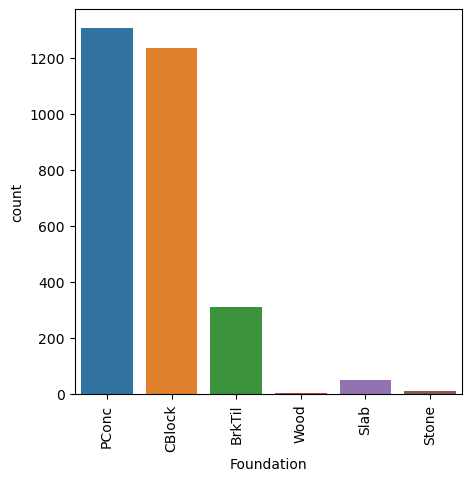

######################################################################

    BsmtQual     Ratio
TA      1283  0.439534
Gd      1209  0.414183
Ex       258  0.088386
Fa        88  0.030147


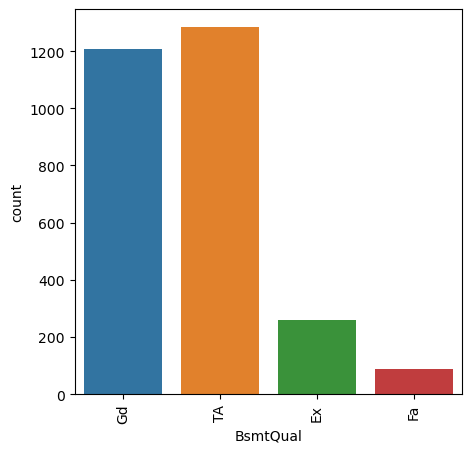

######################################################################

    BsmtCond     Ratio
TA      2606  0.892771
Gd       122  0.041795
Fa       104  0.035629
Po         5  0.001713


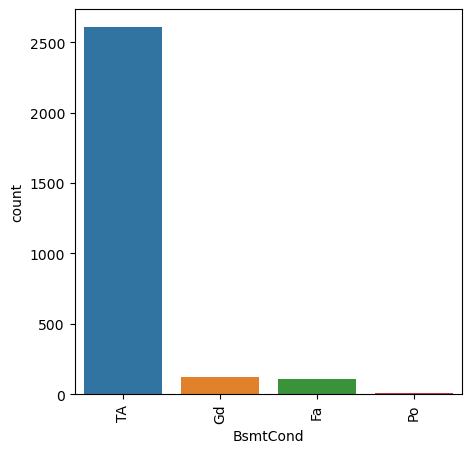

######################################################################

    BsmtExposure     Ratio
No          1904  0.652278
Av           418  0.143200
Gd           276  0.094553
Mn           239  0.081877


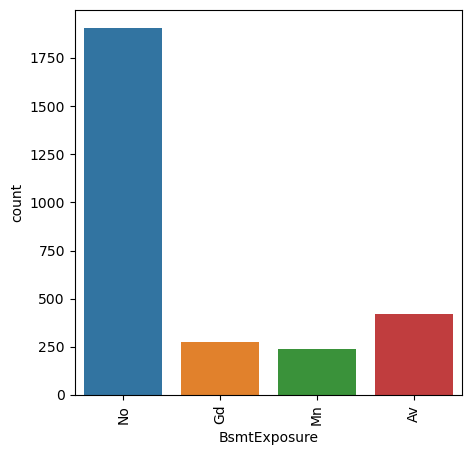

######################################################################

     BsmtFinType1     Ratio
Unf           851  0.291538
GLQ           849  0.290853
ALQ           429  0.146968
Rec           288  0.098664
BLQ           269  0.092155
LwQ           154  0.052758


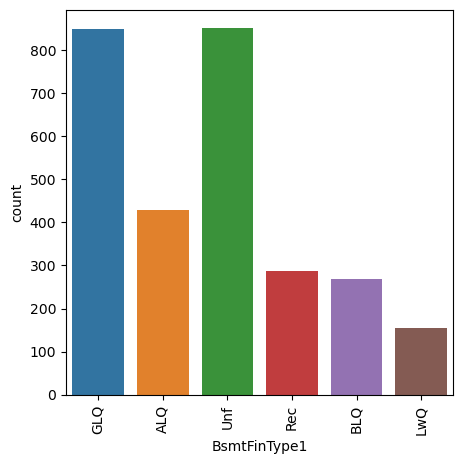

######################################################################

     BsmtFinType2     Ratio
Unf          2493  0.854060
Rec           105  0.035971
LwQ            87  0.029805
BLQ            68  0.023296
ALQ            52  0.017814
GLQ            34  0.011648


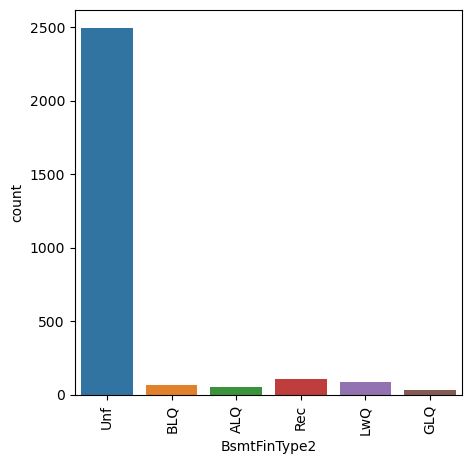

######################################################################

       Heating     Ratio
GasA      2874  0.984584
GasW        27  0.009250
Grav         9  0.003083
Wall         6  0.002055
OthW         2  0.000685
Floor        1  0.000343


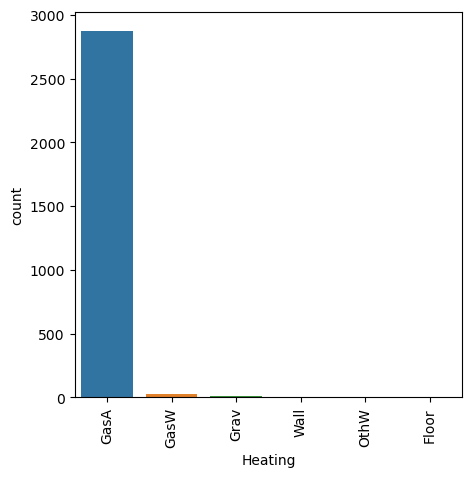

######################################################################

    HeatingQC     Ratio
Ex       1493  0.511477
TA        857  0.293594
Gd        474  0.162384
Fa         92  0.031518
Po          3  0.001028


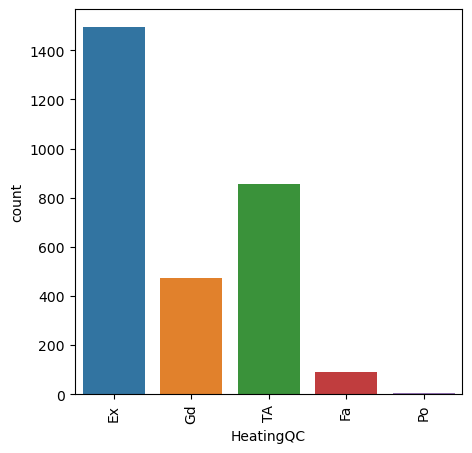

######################################################################

   CentralAir     Ratio
Y        2723  0.932854
N         196  0.067146


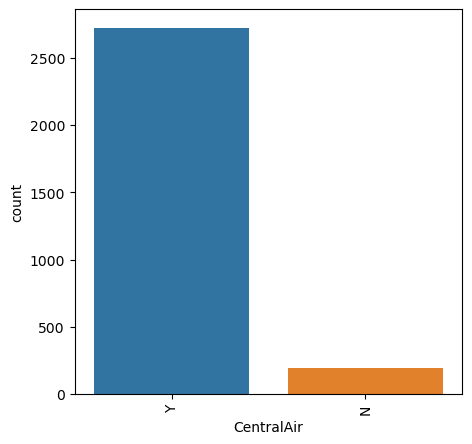

######################################################################

       Electrical     Ratio
SBrkr        2671  0.915039
FuseA         188  0.064406
FuseF          50  0.017129
FuseP           8  0.002741
Mix             1  0.000343


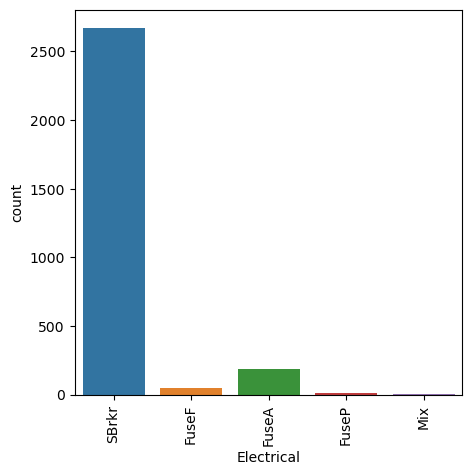

######################################################################

    KitchenQual     Ratio
TA         1492  0.511134
Gd         1151  0.394313
Ex          205  0.070230
Fa           70  0.023981


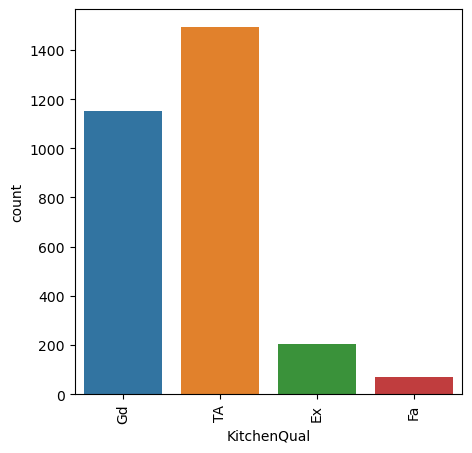

######################################################################

      Functional     Ratio
Typ         2717  0.930798
Min2          70  0.023981
Min1          65  0.022268
Mod           35  0.011990
Maj1          19  0.006509
Maj2           9  0.003083
Sev            2  0.000685


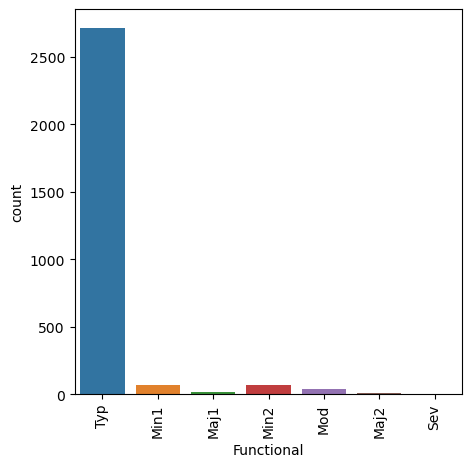

######################################################################

    FireplaceQu     Ratio
Gd          744  0.254882
TA          592  0.202809
Fa           74  0.025351
Po           46  0.015759
Ex           43  0.014731


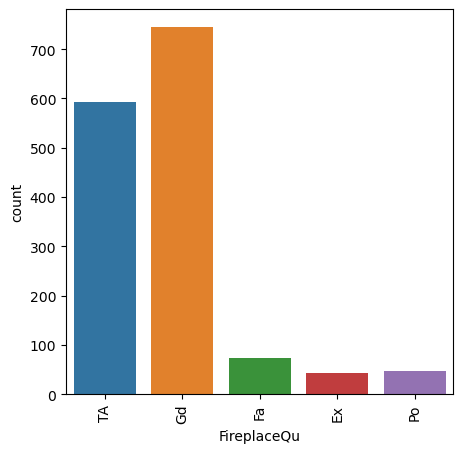

######################################################################

         GarageType     Ratio
Attchd         1723  0.590271
Detchd          779  0.266872
BuiltIn         186  0.063720
Basment          36  0.012333
2Types           23  0.007879
CarPort          15  0.005139


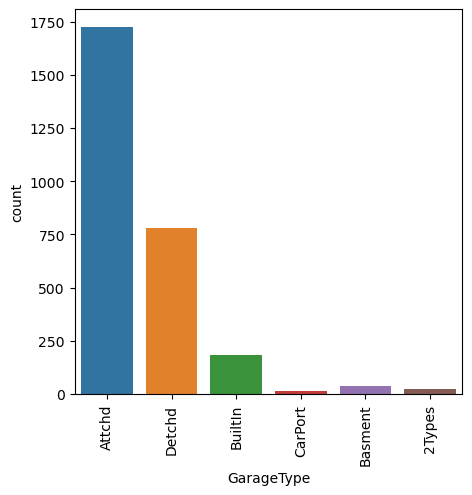

######################################################################

     GarageFinish     Ratio
Unf          1230  0.421377
RFn           811  0.277835
Fin           719  0.246317


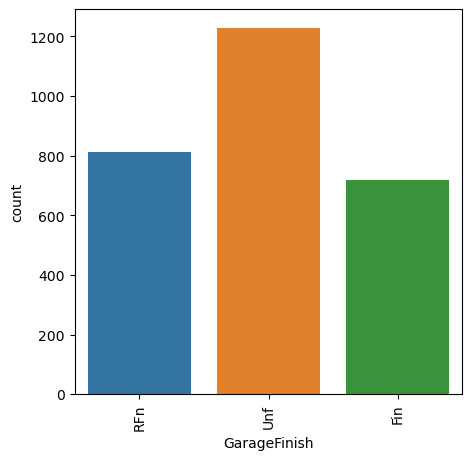

######################################################################

    GarageQual     Ratio
TA        2604  0.892086
Fa         124  0.042480
Gd          24  0.008222
Po           5  0.001713
Ex           3  0.001028


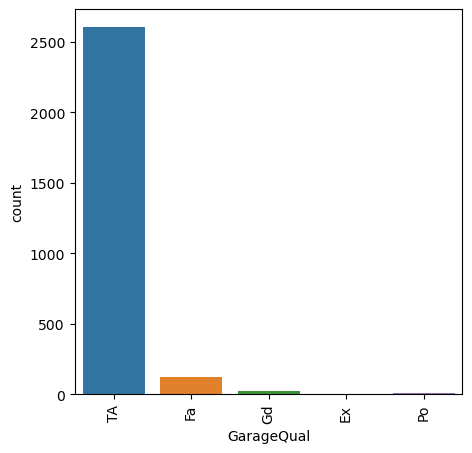

######################################################################

    GarageCond     Ratio
TA        2654  0.909215
Fa          74  0.025351
Gd          15  0.005139
Po          14  0.004796
Ex           3  0.001028


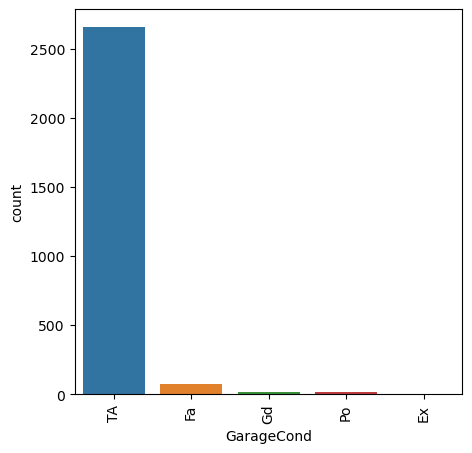

######################################################################

   PavedDrive     Ratio
Y        2641  0.904762
N         216  0.073998
P          62  0.021240


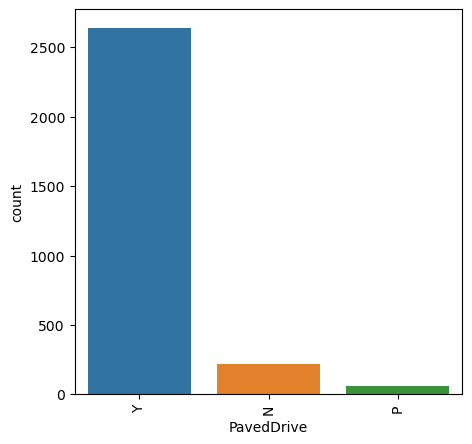

######################################################################

    PoolQC     Ratio
Ex       4  0.001370
Gd       4  0.001370
Fa       2  0.000685


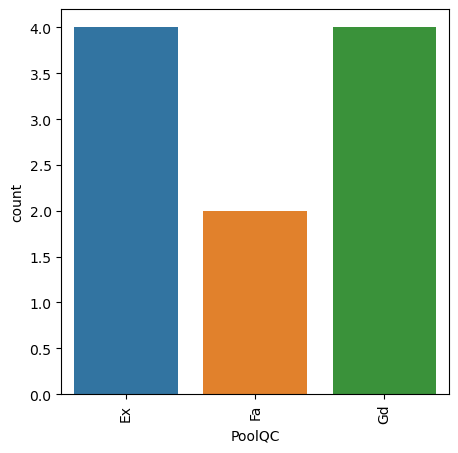

######################################################################

       Fence     Ratio
MnPrv    329  0.112710
GdPrv    118  0.040425
GdWo     112  0.038369
MnWw      12  0.004111


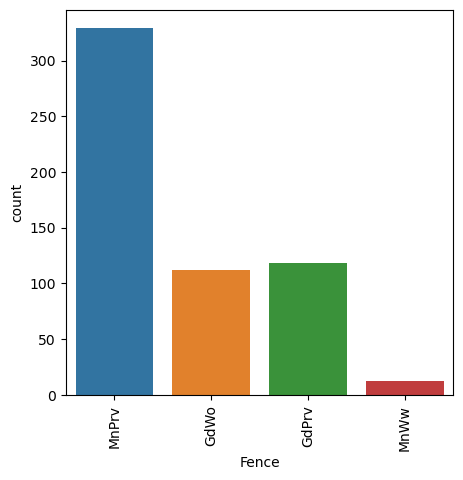

######################################################################

      MiscFeature     Ratio
Shed           95  0.032545
Gar2            5  0.001713
Othr            4  0.001370
TenC            1  0.000343


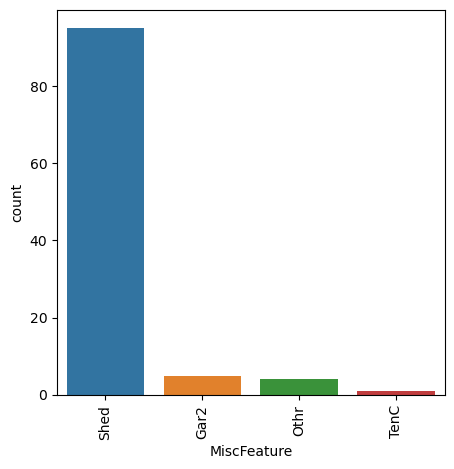

######################################################################

       SaleType     Ratio
WD         2525  0.865022
New         239  0.081877
COD          87  0.029805
ConLD        26  0.008907
CWD          12  0.004111
ConLI         9  0.003083
ConLw         8  0.002741
Oth           7  0.002398
Con           5  0.001713


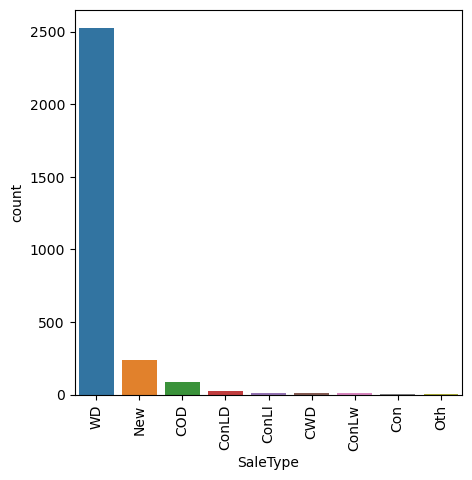

######################################################################

         SaleCondition     Ratio
Normal            2402  0.822885
Partial            245  0.083933
Abnorml            190  0.065091
Family              46  0.015759
Alloca              24  0.008222
AdjLand             12  0.004111


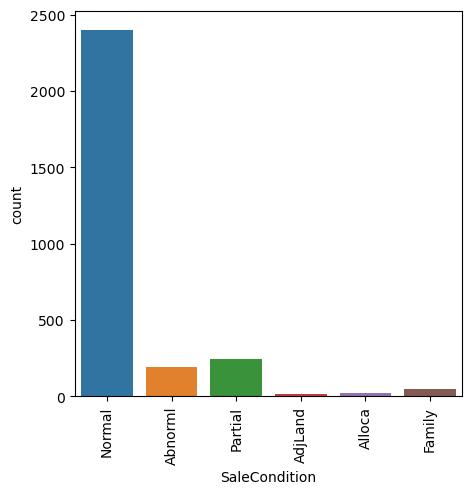

######################################################################

     MSSubClass     Ratio
20         1079  0.369647
60          575  0.196985
50          287  0.098321
120         182  0.062350
30          139  0.047619
70          128  0.043851
160         128  0.043851
80          118  0.040425
90          109  0.037342
190          61  0.020898
85           48  0.016444
75           23  0.007879
45           18  0.006166
180          17  0.005824
40            6  0.002055
150           1  0.000343


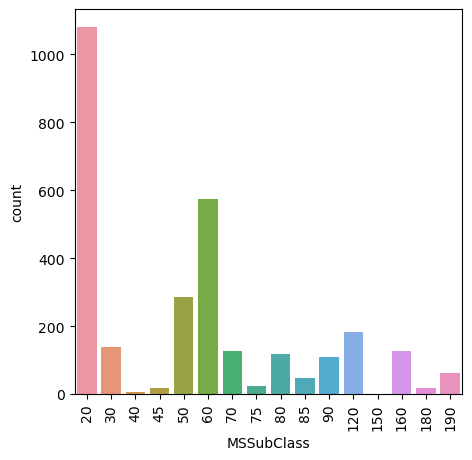

######################################################################

    OverallQual     Ratio
5           825  0.282631
6           731  0.250428
7           600  0.205550
8           342  0.117163
4           226  0.077424
9           107  0.036656
3            40  0.013703
10           31  0.010620
2            13  0.004454
1             4  0.001370


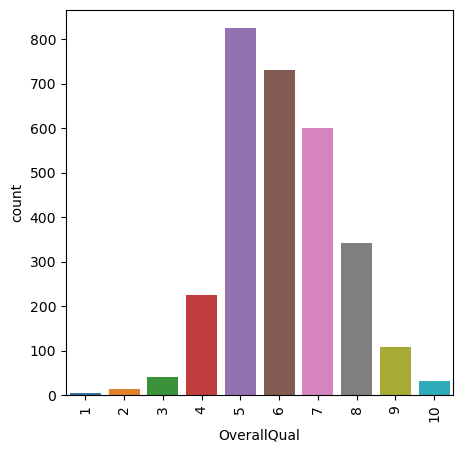

######################################################################

   OverallCond     Ratio
5         1645  0.563549
6          531  0.181912
7          390  0.133607
8          144  0.049332
4          101  0.034601
3           50  0.017129
9           41  0.014046
2           10  0.003426
1            7  0.002398


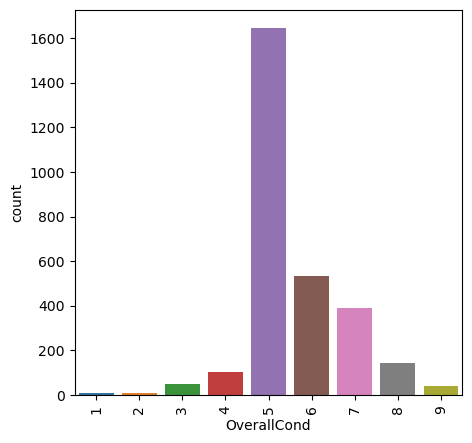

######################################################################

     BsmtFullBath     Ratio
0.0          1705  0.584104
1.0          1172  0.401507
2.0            38  0.013018
3.0             2  0.000685


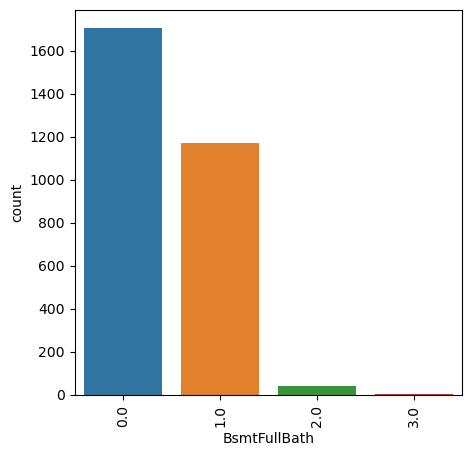

######################################################################

     BsmtHalfBath     Ratio
0.0          2742  0.939363
1.0           171  0.058582
2.0             4  0.001370


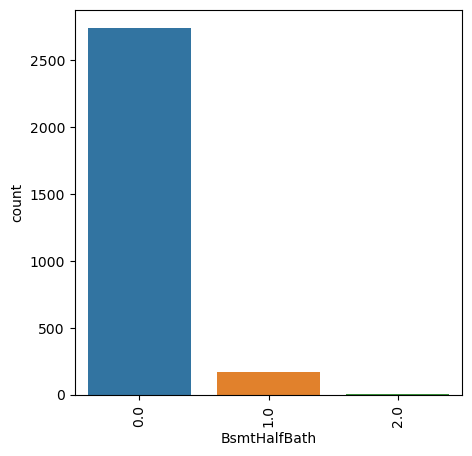

######################################################################

   FullBath     Ratio
2      1530  0.524152
1      1309  0.448441
3        64  0.021925
0        12  0.004111
4         4  0.001370


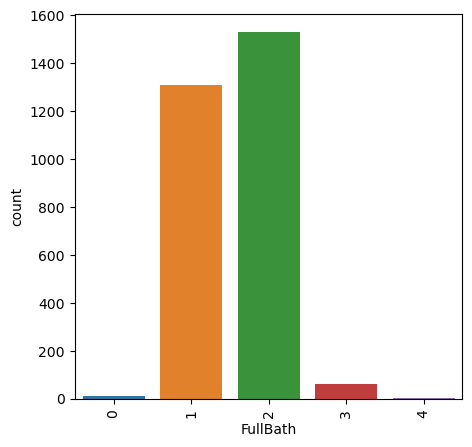

######################################################################

   HalfBath     Ratio
0      1834  0.628297
1      1060  0.363138
2        25  0.008565


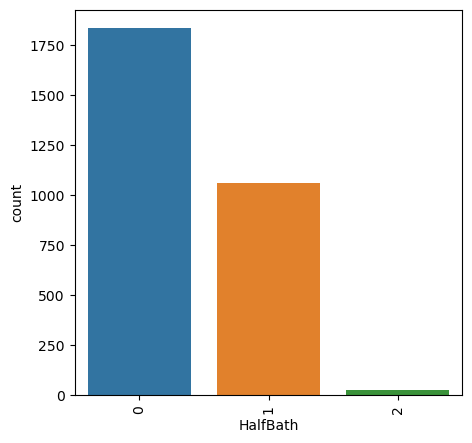

######################################################################

   BedroomAbvGr     Ratio
3          1596  0.546763
2           742  0.254197
4           400  0.137033
1           103  0.035286
5            48  0.016444
6            21  0.007194
0             8  0.002741
8             1  0.000343


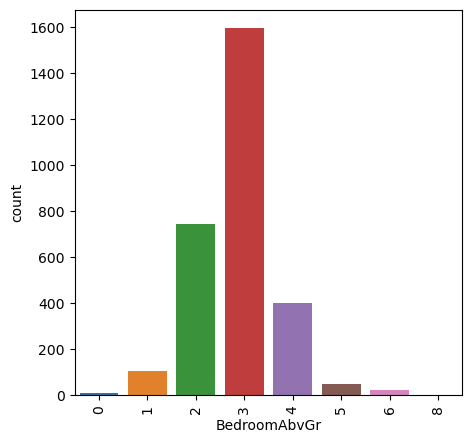

######################################################################

   KitchenAbvGr     Ratio
1          2785  0.954094
2           129  0.044193
0             3  0.001028
3             2  0.000685


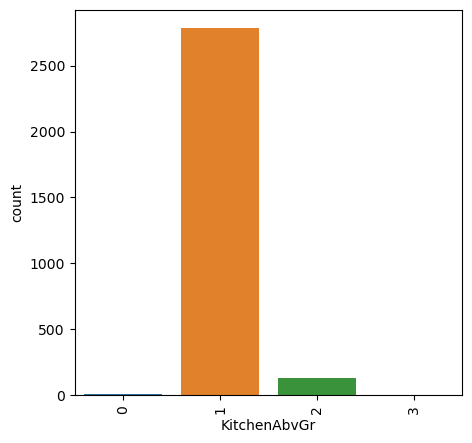

######################################################################

    TotRmsAbvGrd     Ratio
6            844  0.289140
7            649  0.222336
5            583  0.199726
8            347  0.118876
4            196  0.067146
9            143  0.048989
10            80  0.027407
11            32  0.010963
3             25  0.008565
12            16  0.005481
2              1  0.000343
14             1  0.000343
13             1  0.000343
15             1  0.000343


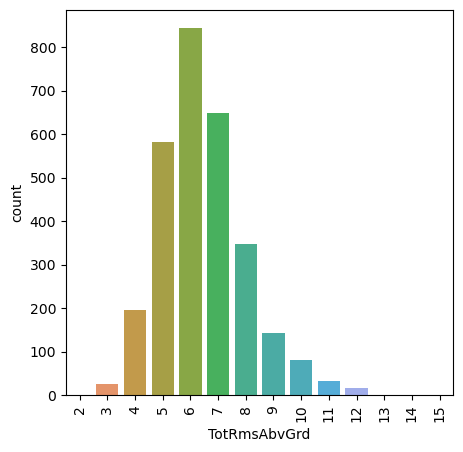

######################################################################

   Fireplaces     Ratio
0        1420  0.486468
1        1268  0.434395
2         219  0.075026
3          11  0.003768
4           1  0.000343


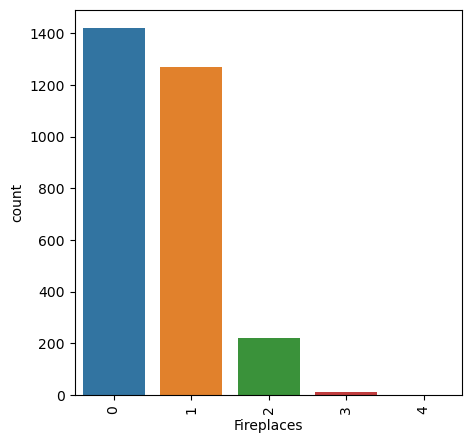

######################################################################

     GarageCars     Ratio
2.0        1594  0.546077
1.0         776  0.265844
3.0         374  0.128126
0.0         157  0.053786
4.0          16  0.005481
5.0           1  0.000343


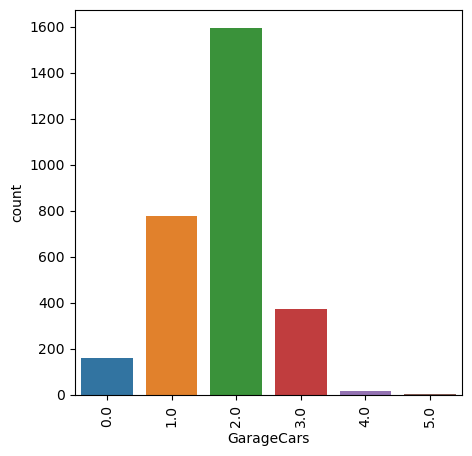

######################################################################

     PoolArea     Ratio
0        2906  0.995546
512         1  0.000343
648         1  0.000343
576         1  0.000343
555         1  0.000343
480         1  0.000343
519         1  0.000343
738         1  0.000343
144         1  0.000343
368         1  0.000343
444         1  0.000343
228         1  0.000343
561         1  0.000343
800         1  0.000343


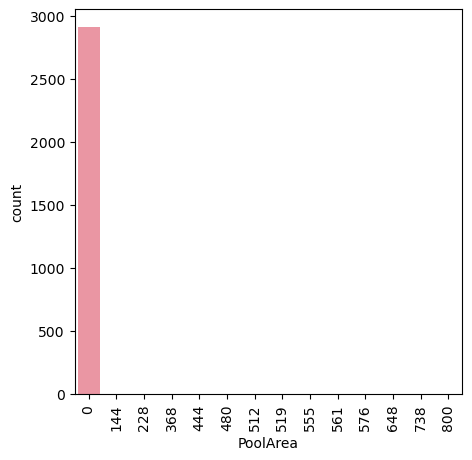

######################################################################

    MoSold     Ratio
6      503  0.172319
7      446  0.152792
5      394  0.134978
4      279  0.095581
8      233  0.079822
3      232  0.079479
10     173  0.059267
9      158  0.054128
11     142  0.048647
2      133  0.045564
1      122  0.041795
12     104  0.035629


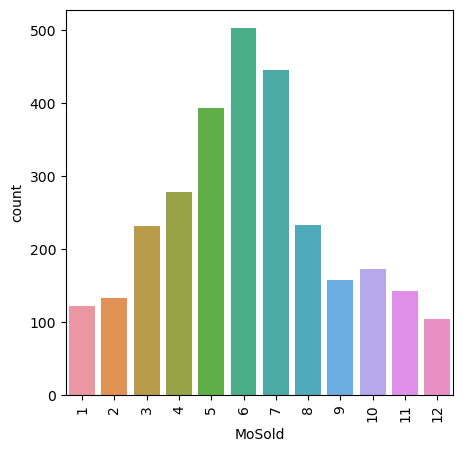

######################################################################

      YrSold     Ratio
2007     692  0.237067
2009     647  0.221651
2008     622  0.213087
2006     619  0.212059
2010     339  0.116136


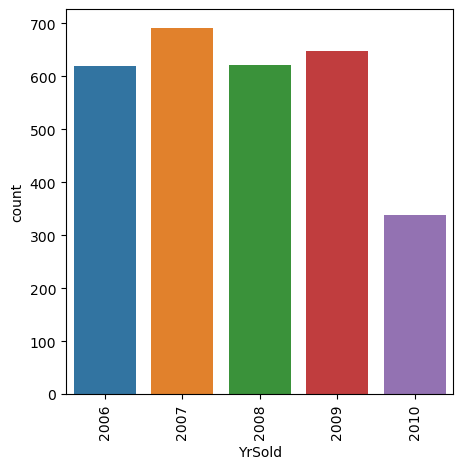

######################################################################



In [977]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

**5-Analysis of target variable**

Target analysis with categorical variables

In [978]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({'Target Mean': dataframe.groupby(categorical_col)[target].mean(),
                       'Ratio': dataframe.groupby(categorical_col)[categorical_col].count() / len(df)}))
    print('################################################################\n')

In [979]:
for col in cat_cols:
    target_summary_with_cat(df, 'SalePrice', col)

            Target Mean     Ratio
MSZoning                         
C (all)    74528.000000  0.008565
FV        214014.061538  0.047619
RH        131558.375000  0.008907
RL        191004.994787  0.775951
RM        126316.830275  0.157588
################################################################

          Target Mean     Ratio
Street                         
Grvl    130190.500000  0.004111
Pave    181130.538514  0.995889
################################################################

         Target Mean     Ratio
Alley                         
Grvl   122219.080000  0.041110
Pave   168000.585366  0.026721
################################################################

            Target Mean     Ratio
LotShape                         
IR1       206101.665289  0.331620
IR2       239833.365854  0.026036
IR3       216036.500000  0.005481
Reg       164754.818378  0.636862
################################################################

               Target Mean     Ratio
LandC

             Target Mean     Ratio
HeatingQC                         
Ex         214914.429150  0.511477
Fa         123919.489796  0.031518
Gd         156858.871369  0.162384
Po          87000.000000  0.001028
TA         142362.876168  0.293594
################################################################

              Target Mean     Ratio
CentralAir                         
N           105264.073684  0.067146
Y           186186.709890  0.932854
################################################################

              Target Mean     Ratio
Electrical                         
FuseA       122196.893617  0.064406
FuseF       107675.444444  0.017129
FuseP        97333.333333  0.002741
Mix          67000.000000  0.000343
SBrkr       186825.113193  0.915039
################################################################

               Target Mean     Ratio
KitchenQual                         
Ex           328554.670000  0.070230
Fa           105565.205128  0.023981
Gd           

**6-Outlier Analysis**

In [980]:
def outlier_threshold(dataframe, col_name, q1=0.05, q3=0.95):
    
    quartile_1 = dataframe[col_name].quantile(q1)
    quartile_3 = dataframe[col_name].quantile(q3)
    interquartile = quartile_3 - quartile_1
    low_limit = quartile_1 - 1.5 * interquartile
    up_limit = quartile_3 + 1.5 * interquartile
    
    return round(up_limit), round(low_limit)

In [981]:
def check_outlier(dataframe, col_name):
    
    up_limit, low_limit = outlier_threshold(dataframe, col_name)
    
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [982]:
for col in num_cols:
    print(col, check_outlier(df, col))

LotFrontage True
LotArea True
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
SalePrice True


**7-Missing Values**

In [983]:
def missing_value_table(dataframe, na_name=False):
    
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    
    if na_name == True:
        return na_columns

In [984]:
missing_value_table(df, na_name=False)

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
SalePrice       1459  49.98
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageCond       159   5.45
GarageYrBlt      159   5.45
GarageFinish     159   5.45
GarageQual       159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
Functional         2   0.07
BsmtHalfBath       2   0.07
BsmtFullBath       2   0.07
Utilities          2   0.07
KitchenQual        1   0.03
TotalBsmtSF        1   0.03
BsmtUnfSF          1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03
Electrical         1

## Task 2: Feature Engineering

**1- Outlierthreshold and Missing Value**

In [985]:
def replace_thresholds(dataframe, col_name):
    
    up_limit, low_limit = outlier_threshold(dataframe, col_name)
    dataframe.loc[dataframe[col_name] < low_limit, col_name] = low_limit
    dataframe.loc[dataframe[col_name] > up_limit, col_name] = up_limit

In [986]:
for col in num_cols:
    print(col, check_outlier(df, col))

LotFrontage True
LotArea True
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
SalePrice True


In [987]:
for col in num_cols:
    print(col, check_outlier(df, col))

LotFrontage True
LotArea True
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
SalePrice True


In [988]:
for col in num_cols:
    replace_thresholds(df, col)

In [989]:
for col in num_cols:
    print(col, check_outlier(df, col))

LotFrontage False
LotArea False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
MiscVal False
SalePrice False


**Fill Missing Numerical Values**

In [990]:
missing_value_table(df.drop('SalePrice', axis=1), na_name=False)

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageFinish     159   5.45
GarageQual       159   5.45
GarageCond       159   5.45
GarageYrBlt      159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
Functional         2   0.07
Utilities          2   0.07
GarageArea         1   0.03
GarageCars         1   0.03
Electrical         1   0.03
KitchenQual        1   0.03
TotalBsmtSF        1   0.03
BsmtUnfSF          1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03


In [991]:
df.loc[df['PoolQC'].isnull(), 'PoolQC'] = 'No Pool'

In [992]:
df.loc[df['MiscFeature'].isnull(), 'MiscFeature'] = 'No MiscFeathure'

In [993]:
df.loc[df['Alley'].isnull(), 'Alley'] = 'No alley access'

In [994]:
df.loc[df['Fence'].isnull(), 'Fence'] = 'No Fence'

In [995]:
df.loc[df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'No Fireplace'

In [996]:
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = 0

In [997]:
df.loc[df['GarageCond'].isnull(), 'GarageCond'] = 'No Garage'

In [998]:
df.loc[df['GarageQual'].isnull(), 'GarageQual'] = 'No Garage'

In [999]:
df.loc[df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0

In [1000]:
df.loc[df['GarageFinish'].isnull(), 'GarageFinish'] = 'No Garage'

In [1001]:
df.loc[df['GarageType'].isnull(), 'GarageType'] = 'No Garage'

In [1002]:
df.loc[df['BsmtCond'].isnull(), 'BsmtCond'] = 'No Basement'

In [1003]:
df.loc[df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'No Basement'

In [1004]:
df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = 'No Basement'

In [1005]:
df.loc[df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'No Basement'

In [1006]:
df.loc[df['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'No Basement'

In [1007]:
df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = df['MasVnrType'].mode().values[0]

In [1008]:
df.loc[df['MasVnrArea'].isnull(), 'MasVnrArea'] = df['MasVnrArea'].mode().values[0]

In [1009]:
missing_value_table(df.drop('SalePrice', axis=1), na_name=False)

              n_miss  ratio
MSZoning           4   0.14
Utilities          2   0.07
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
Functional         2   0.07
Exterior1st        1   0.03
Exterior2nd        1   0.03
BsmtFinSF1         1   0.03
BsmtFinSF2         1   0.03
BsmtUnfSF          1   0.03
TotalBsmtSF        1   0.03
Electrical         1   0.03
KitchenQual        1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
SaleType           1   0.03


**Get columns with missing value except SalePrice and delete them**

In [1010]:
missing_columns = df.columns[df.isna().any()].drop('SalePrice')
missing_columns

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')

In [1011]:
for col in missing_columns:
    labels = df[df[col].isnull()].index.tolist()
    df.drop(labels=labels, axis=0, inplace=True)

In [1012]:
missing_value_table(df.drop('SalePrice', axis=1), na_name=False)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


**2- Rare Encoding**

In [1013]:
def rare_analyzer(dataframe, target, cat_cols):
    
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                           'RATIO': dataframe[col].value_counts() / len(dataframe),
                           'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

In [1014]:
rare_analyzer(df, 'SalePrice', cat_cols)

MSZoning : 5
         COUNT     RATIO    TARGET_MEAN
C (all)     25  0.008603   74528.000000
FV         139  0.047832  214014.061538
RH          26  0.008947  131558.375000
RL        2259  0.777357  190909.346957
RM         457  0.157261  126316.830275


Street : 2
      COUNT     RATIO    TARGET_MEAN
Grvl     11  0.003785  130190.500000
Pave   2895  0.996215  181048.040606


Alley : 3
                 COUNT     RATIO    TARGET_MEAN
Grvl               119  0.040950  122219.080000
No alley access   2709  0.932209  183366.204678
Pave                78  0.026841  168000.585366


LotShape : 4
     COUNT     RATIO    TARGET_MEAN
IR1    963  0.331383  205825.838843
IR2     76  0.026153  239833.365854
IR3     16  0.005506  216036.500000
Reg   1851  0.636958  164751.847403


LandContour : 4
     COUNT     RATIO    TARGET_MEAN
Bnk    116  0.039917  143104.079365
HLS    120  0.041294  231533.940000
Low     58  0.019959  203661.111111
Lvl   2612  0.898830  180091.520611


Utilities : 2
        CO

           COUNT     RATIO    TARGET_MEAN
Ex             3  0.001032  124000.000000
Fa            71  0.024432  114654.028571
Gd            15  0.005162  179930.000000
No Garage    157  0.054026  103317.283951
Po            13  0.004474  108500.000000
TA          2647  0.910874  187800.366038


PavedDrive : 3
   COUNT     RATIO    TARGET_MEAN
N    210  0.072264  115039.122222
P     62  0.021335  132330.000000
Y   2634  0.906401  186348.412995


PoolQC : 4
         COUNT     RATIO    TARGET_MEAN
Ex           4  0.001376  459125.000000
Fa           2  0.000688  215500.000000
Gd           4  0.001376  201990.000000
No Pool   2896  0.996559  180364.136364


Fence : 5
          COUNT     RATIO    TARGET_MEAN
GdPrv       118  0.040606  178927.457627
GdWo        112  0.038541  140379.314815
MnPrv       327  0.112526  148357.777070
MnWw         12  0.004129  134286.363636
No Fence   2337  0.804198  187552.989813


MiscFeature : 5
                 COUNT     RATIO    TARGET_MEAN
Gar2            

In [1015]:
def rare_encoder(dataframe, rare_perc):
    
    temp_df = df.copy()
    
    rare_colums = [col for col in temp_df.columns if ((temp_df[col].dtype == 'O') and 
                                                      ((temp_df[col].value_counts() / len(temp_df)) < rare_perc).any(axis=0))]
    
    for col in rare_colums:
        tmp = temp_df[col].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[col] = np.where(temp_df[col].isin(rare_labels), 'Rare', temp_df[col])
        
    return temp_df

In [1016]:
df = rare_encoder(df, 0.01)

In [1017]:
rare_analyzer(df, 'SalePrice', cat_cols)

MSZoning : 4
      COUNT     RATIO    TARGET_MEAN
FV      139  0.047832  214014.061538
RL     2259  0.777357  190909.346957
RM      457  0.157261  126316.830275
Rare     51  0.017550  109623.615385


Street : 2
      COUNT     RATIO    TARGET_MEAN
Pave   2895  0.996215  181048.040606
Rare     11  0.003785  130190.500000


Alley : 3
                 COUNT     RATIO    TARGET_MEAN
Grvl               119  0.040950  122219.080000
No alley access   2709  0.932209  183366.204678
Pave                78  0.026841  168000.585366


LotShape : 4
      COUNT     RATIO    TARGET_MEAN
IR1     963  0.331383  205825.838843
IR2      76  0.026153  239833.365854
Rare     16  0.005506  216036.500000
Reg    1851  0.636958  164751.847403


LandContour : 4
     COUNT     RATIO    TARGET_MEAN
Bnk    116  0.039917  143104.079365
HLS    120  0.041294  231533.940000
Low     58  0.019959  203661.111111
Lvl   2612  0.898830  180091.520611


Utilities : 2
        COUNT     RATIO    TARGET_MEAN
AllPub   2905  0.9996

**3- Feature Extraction**

**Deleting columns with all rows same**

In [1018]:
counts = df.nunique()

In [1019]:
all_rows_same = counts[counts < 2].index
all_rows_same

Index(['LowQualFinSF', '3SsnPorch', 'MiscVal'], dtype='object')

In [1020]:
for col in all_rows_same:
    df.drop(col, axis=1, inplace=True)

**Deleting columns with nearly all rows same (greater than %95)**

In [1021]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': df[col_name].value_counts() / len(df)}))
    
    if plot:
        plt.figure(figsize=(5, 5))
        sns.countplot(x=col_name, data=dataframe)
        plt.xticks(rotation=90)
        plt.show()
        
    print('######################################################################\n')

In [1022]:
for col in cat_cols:
    cat_summary(df, col, plot=False)

      MSZoning     Ratio
RL        2259  0.777357
RM         457  0.157261
FV         139  0.047832
Rare        51  0.017550
######################################################################

      Street     Ratio
Pave    2895  0.996215
Rare      11  0.003785
######################################################################

                 Alley     Ratio
No alley access   2709  0.932209
Grvl               119  0.040950
Pave                78  0.026841
######################################################################

      LotShape     Ratio
Reg       1851  0.636958
IR1        963  0.331383
IR2         76  0.026153
Rare        16  0.005506
######################################################################

     LandContour     Ratio
Lvl         2612  0.898830
HLS          120  0.041294
Bnk          116  0.039917
Low           58  0.019959
######################################################################

        Utilities     Ratio
AllPub       2905  0.99965

In [1023]:
df.drop(['Street', 'Utilities', 'LandSlope', 'Condition2', 
    'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature', 'PoolArea'], axis=1, inplace=True)

**Creating new features**

In [1024]:
# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"] 

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2 

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df.WoodDeckSF 

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF 

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF 

In [1025]:
# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea 

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea 

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea 

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea 

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF) 


df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"] 

In [1026]:
df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt 

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt 

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd 

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt 

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt 

**3- Encoding**

In [1027]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=20, car_th=25)

Observations: 2906
Variables: 86
Categorical Variables: 49
Numerical Variables: 37
Numerical But Categorical Variables: 14
Categorical But Cardinal: 0


**Get binary cols and label encoding**

In [1028]:
binary_cols = [col for col in df.columns if ((df[col].dtype not in ['int64', 'float64']) and df[col].nunique() == 2)]
binary_cols

['CentralAir']

In [1029]:
def label_encoder(dataframe, binary_col):
    
    le = LabelEncoder()
    dataframe[binary_col] = le.fit_transform(dataframe[binary_col])
    
    return dataframe

In [1030]:
for col in binary_cols:
    label_encoder(df, col)

**One hot encoding**

In [1031]:
def one_hot_encoder(dataframe, one_hot_cols, drop_first=True):
    
    dataframe = pd.get_dummies(dataframe, columns=one_hot_cols, drop_first=drop_first)
    
    return dataframe

In [1032]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

## Task 3: Model

**1- Split train and test data**

In [1033]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

**2- Modelling with train test and evaluate model results**

In [1034]:
df

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_1,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Rare,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No Garage,GarageQual_Rare,GarageQual_TA,GarageCond_No Garage,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,To

In [1035]:
y = train_df['SalePrice']
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [1036]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [1037]:
models = [
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())
        ]

In [1038]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name})")

RMSE: 39018.9836 (CART)
RMSE: 29306.2534 (RF)
RMSE: 25076.1626 (GBM)
RMSE: 29466.846 (XGBoost)
RMSE: 28491.9122 (LightGBM)


**2- Performing a log transform to the target variable and observe the rmse results.**

In [1039]:
y = np.log1p(train_df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [1040]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [1041]:
gbm = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = gbm.predict(X_test)

In [1042]:
new_y = np.expm1(y_pred)
new_y_test = np.expm1(y_test)

In [1043]:
np.sqrt(mean_squared_error(new_y_test, new_y))

28813.09406701519

**3- Hyperparameter Optimization**

In [1059]:
y = train_df['SalePrice']
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [1060]:
gbm_model = GradientBoostingRegressor(random_state=46)

In [1061]:
rmse = np.mean(np.sqrt(-cross_val_score(gbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [1062]:
gbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
             }

In [1063]:
gbm_gs_best = GridSearchCV(gbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [1064]:
final_model = gbm_model.set_params(**gbm_gs_best.best_params_).fit(X, y)

In [1065]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [1068]:
rmse

24931.643387514665

In [1073]:
df['SalePrice'].mean()

180838.89376285128

In [1074]:
df['SalePrice'].std()

78849.05274711276

In [1075]:
rmse / df['SalePrice'].mean()

0.13786659976038979

**3-Feature Importance**

In [1069]:
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

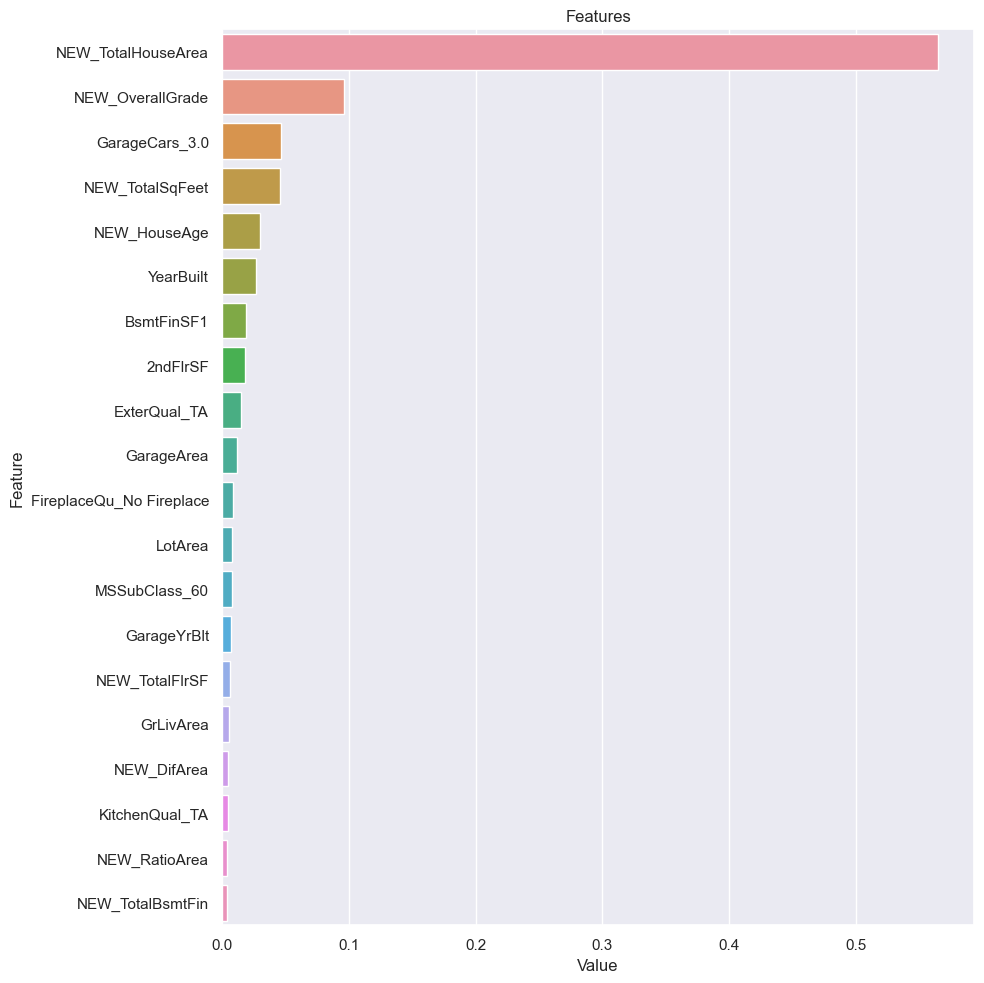

In [1071]:
model = GradientBoostingRegressor()
model.fit(X, y)

plot_importance(model, X, 20)